In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


## Data Cleaning
**Goal:** Replacy any missing values with the median value and convert various variables from float to int data types

In [3]:
missing_values = data.isnull().sum()
print("Missing values:")
missing_values

Missing values:


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
imputer = SimpleImputer(strategy = 'median')
data[['Movement off the Ball',
      'Big Game Performance',
      'Penalty Success Rate']] = imputer.fit_transform(data[['Movement off the Ball',
                                                             'Big Game Performance',
                                                             'Penalty Success Rate']])

In [6]:
missing_values = data.isnull().sum()
print("Missing values:")
missing_values

Missing values:


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [7]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [8]:
data['Goals Scored'] = data['Goals Scored'].astype(int)
data['Assists'] = data['Assists'].astype(int)
data['Shots on Target'] = data['Shots on Target'].astype(int)
data['Movement off the Ball'] = data['Movement off the Ball'].astype(int)
data['Hold-up Play'] = data['Hold-up Play'].astype(int)
data['Aerial Duels Won'] = data['Aerial Duels Won'].astype(int)
data['Defensive Contribution'] = data['Defensive Contribution'].astype(int)
data['Big Game Performance'] = data['Big Game Performance'].astype(int)
data['Impact on Team Performance'] = data['Impact on Team Performance'].astype(int)
data['Off-field Conduct'] = data['Off-field Conduct'].astype(int)

In [9]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

## Exploratory Analysis

**Descriptive Analysis**

In [10]:
round(data.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


**Percentage Analysis**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
freq_footedness = data['Footedness'].value_counts()
perc_footedness = freq_footedness / len(data['Footedness'])*100
perc_footedness

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

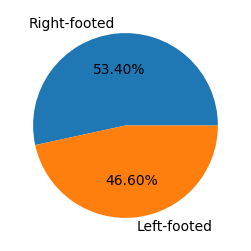

In [13]:
plt.figure(figsize = (5,3))
perc_footedness.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel('')
plt.show()

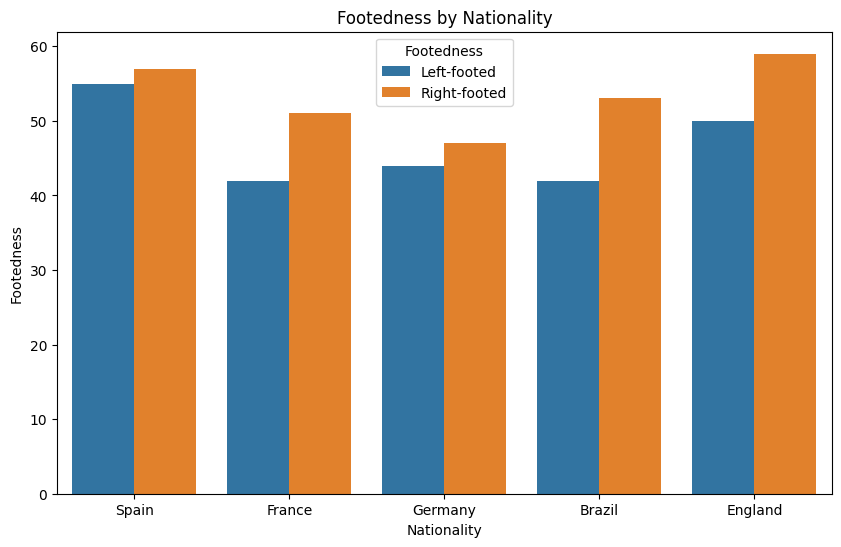

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Nationality', hue = 'Footedness', data = data)
plt.title('Footedness by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Footedness')
plt.show()

In [15]:
avg_goals_by_nationality = data.groupby('Nationality')['Goals Scored'].mean()
round(avg_goals_by_nationality, 2)

Nationality
Brazil     15.32
England    13.90
France     14.41
Germany    14.35
Spain      14.69
Name: Goals Scored, dtype: float64

In [16]:
conversion_rate_by_footedness = data.groupby('Footedness')['Conversion Rate'].mean()
conversion_rate_by_footedness

Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64

In [17]:
footedness_by_nationality = pd.crosstab(data['Nationality'], data['Footedness'])
footedness_by_nationality

Footedness,Left-footed,Right-footed
Nationality,,
Brazil,42,53
England,50,59
France,42,51
Germany,44,47
Spain,55,57


In [18]:
num_variables = data.select_dtypes(include = ['number']).columns
correl = round(data[num_variables].corr(), 3)
correl

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
Striker_ID,1.000,0.025,0.066,0.003,0.018,0.047,-0.031,0.060,-0.036,0.016,0.012,-0.052,-0.017,-0.006,-0.027,0.103
Goals Scored,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,0.016,0.003,-0.047,0.014,-0.004,0.045,-0.021,0.103,-0.053
Assists,0.066,-0.071,1.000,0.072,-0.020,0.028,0.050,0.011,-0.046,0.001,-0.011,0.026,-0.007,-0.081,-0.022,-0.015
Shots on Target,0.003,-0.059,0.072,1.000,-0.021,-0.044,0.010,-0.062,-0.102,-0.068,0.011,0.039,0.049,0.029,0.025,0.055
Shot Accuracy,0.018,0.066,-0.020,-0.021,1.000,-0.088,0.023,-0.018,-0.044,0.012,0.027,-0.019,0.005,0.017,0.041,0.084
Conversion Rate,0.047,-0.011,0.028,-0.044,-0.088,1.000,-0.020,0.038,0.059,0.059,-0.002,0.037,0.031,-0.049,-0.031,-0.004
Dribbling Success,-0.031,0.034,0.050,0.010,0.023,-0.020,1.000,-0.056,0.002,-0.072,0.015,-0.059,-0.030,-0.054,-0.012,-0.060
Movement off the Ball,0.060,0.016,0.011,-0.062,-0.018,0.038,-0.056,1.000,-0.057,0.013,-0.006,-0.075,-0.030,-0.071,-0.046,-0.035
Hold-up Play,-0.036,0.003,-0.046,-0.102,-0.044,0.059,0.002,-0.057,1.000,0.080,0.029,-0.031,0.147,0.068,-0.046,0.035
Aerial Duels Won,0.016,-0.047,0.001,-0.068,0.012,0.059,-0.072,0.013,0.080,1.000,-0.025,-0.013,0.047,-0.002,0.043,0.004


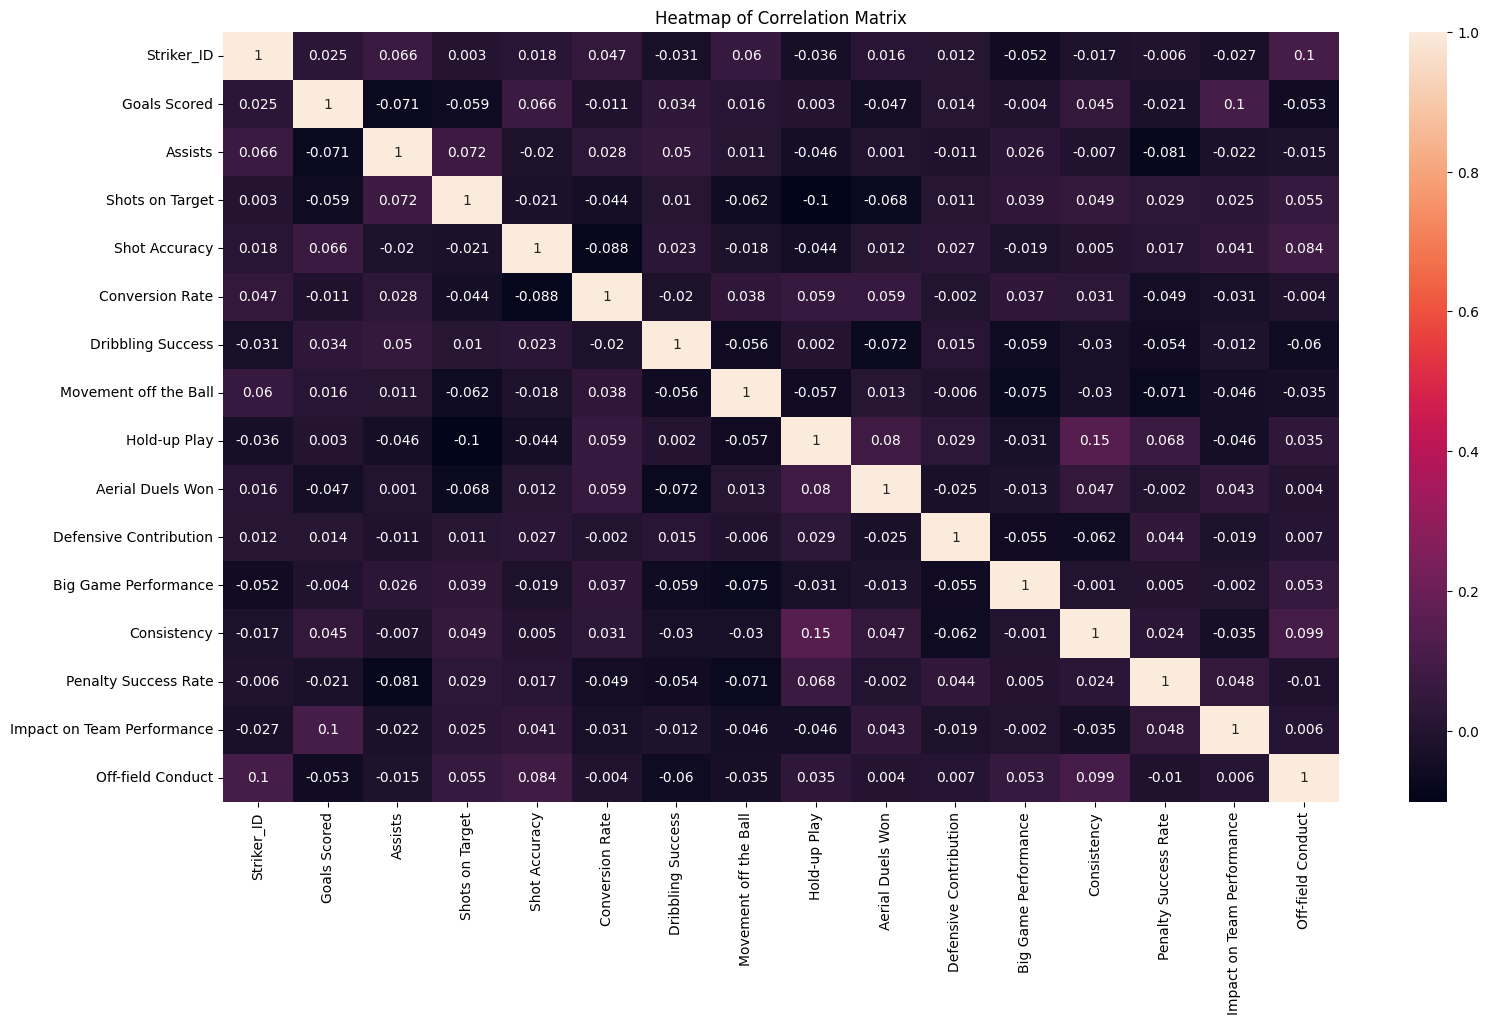

In [19]:
plt.figure(figsize=(18, 10))
sns.heatmap(correl, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Statistical Analysis

***

**Goal:** Verify if Consistency and Hold-up Play are normally distributed

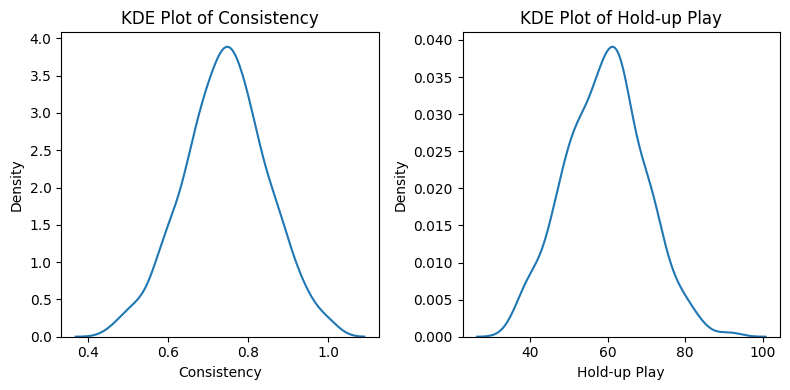

In [20]:
numeric_columns = ['Consistency', 'Hold-up Play']

fig, axes = plt.subplots(1, 2, figsize = (8,4))

for index, column in enumerate(numeric_columns):
    sns.kdeplot(data[column], ax = axes[index])
    axes[index].set_title(f'KDE Plot of {column}')

plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import shapiro

In [22]:
shapiro_results = {}

for column in numeric_columns:
    stat, p_value = shapiro(data[column])
    shapiro_results[column] = round(p_value, 3)

shapiro_results

{'Consistency': np.float64(0.451), 'Hold-up Play': np.float64(0.151)}

**Result:** Consistency and Hold-up Play are normally distributed because their p-values > 0.05, so we are free to perform statistical analysis on both of these columns

***

**Goal:** Understand if there is a significant difference in consistency rates among different nationalities

In [23]:
from scipy.stats import levene

brazil_striker = data.query('Nationality == "Brazil"')['Consistency']
england_striker = data.query('Nationality == "England"')['Consistency']
france_striker = data.query('Nationality == "France"')['Consistency']
germany_striker = data.query('Nationality == "Germany"')['Consistency']
spain_striker = data.query('Nationality == "Spain"')['Consistency']

stats, p_value = levene(brazil_striker, england_striker, france_striker, germany_striker, spain_striker)
print("P-value: ", p_value)

P-value:  0.8083990350934653


**Result:** We can perform the ANOVA test (below) because the levene p-value > 0.05

In [24]:
from scipy import stats

Test_stat, p_value = stats.f_oneway(brazil_striker, england_striker, france_striker, germany_striker, spain_striker)
print("P-value: ", p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P-value:  0.19278675901599154
Fail to reject the null hypothesis


**Result:** There is NO significant difference in consistency rates between different nationalities

***

**Goal:** Understand if there is a significant correlation or signifcant influence between strikers' Hold-up Play and Consistency Rate

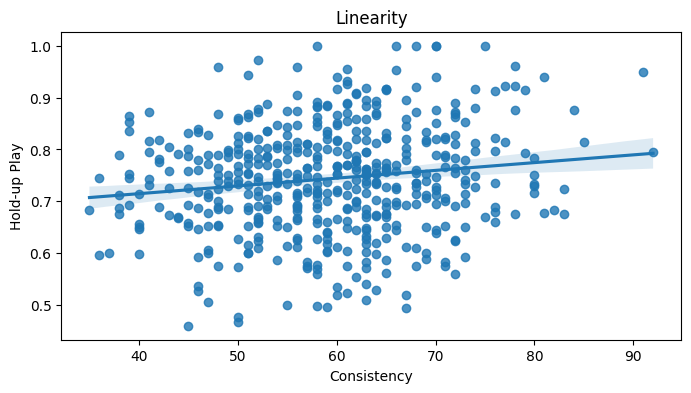

In [25]:
plt.figure(figsize = (8, 4))
sns.regplot(x = 'Hold-up Play', y = 'Consistency', data = data)
plt.title('Linearity')
plt.xlabel('Consistency')
plt.ylabel('Hold-up Play')
plt.show()

In [26]:
from scipy.stats import pearsonr

holdup_play = data['Hold-up Play']
consistency = data['Consistency']

corr, p_value = pearsonr(holdup_play, consistency)
print("Correlation coefficient: ", corr)
print("P-value: ", p_value)

if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Correlation coefficient:  0.14654573283554145
P-value:  0.0010146963053630409
Reject the null hypothesis


**Result:** There is a weak positive but significant correlation between hold-up play and consistency

In [27]:
import statsmodels.api as sm

x = data['Hold-up Play']
y = data['Consistency']

x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Wed, 18 Dec 2024   Prob (F-statistic):            0.00101
Time:                        10:30:29   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

**Result:** Hold-up Play significantly influences Consistency. AS the Hold-up Play score increases by 1, the Consistency score increases by 0.0015 points.

## Feature Engineering

**Goal:** Create a Total Contribution Score column tallying various performance measures

In [28]:
data['Total Contribution Score'] = data['Goals Scored'] + data ['Assists'] + data['Shots on Target'] + data['Dribbling Success'] + data['Aerial Duels Won'] + data['Defensive Contribution'] + data['Big Game Performance'] + data['Consistency']

In [29]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


***

**Goal:** Encode the Footedness and Marital Status values <br>
-  Footedness: Left-footed = 0, Right-footed = 1 <br>
-  Marital Status: No = 0, Yes = 1

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Footedness'] = encoder.fit_transform(data['Footedness'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


***

**Goal:** Create dummy variables for Nationality and name them accordingly

In [31]:
dummies = pd.get_dummies(data['Nationality'])
processed_df = pd.concat([data, dummies], axis = 1)
processed_df = processed_df.rename(columns = {'Brazil': 'Nationality_Brazil', 'England': 'Nationality_England', 'France': 'Nationality_France', 'Germany': 'Nationality_Germany', 'Spain': 'Nationality_Spain'})
processed_df = processed_df.drop('Nationality', axis = 1)
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,False,False,False,False,True
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,False,False,True,False,False
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,False,False,False,True,False
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,False,False,True,False,False
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,False,False,True,False,False


## Clustering Analysis

**Goal:** Differentiate regular vs. excellent strikers based on the Total Contribution Score and calculate their ranking in a new column Striker Ranking

In [32]:
from sklearn.cluster import KMeans

x = processed_df.drop('Striker_ID', axis = 1)

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

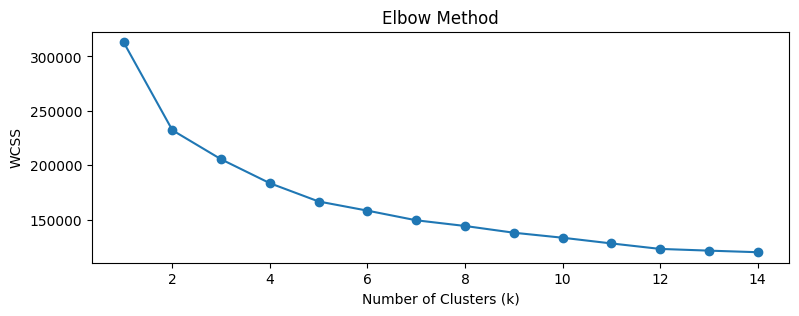

In [33]:
plt.figure(figsize = (9, 3))
plt.plot(range(1, 15), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [34]:
final_km = KMeans(n_clusters = 2)
final_km.fit(x)

labels = final_km.labels_
labels

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [35]:
processed_df['Clusters'] = labels
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,False,False,False,False,True,0
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,False,False,True,False,False,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,False,False,False,True,False,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,False,False,True,False,False,1
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,False,False,True,False,False,0


In [36]:
round(processed_df.groupby('Clusters')['Total Contribution Score'].mean(), 2)

Clusters
0    102.15
1    123.57
Name: Total Contribution Score, dtype: float64

In [37]:
mapping = {0:'Excellent', 1:'Regular'}
processed_df['Striker Ranking'] = processed_df['Clusters'].map(mapping)
processed_df = processed_df.drop('Clusters', axis = 1)
processed_df.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution Score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Striker Ranking
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,False,False,False,False,True,Excellent
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,False,False,True,False,False,Excellent
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,False,False,False,True,False,Excellent
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,False,False,True,False,False,Regular
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,False,False,True,False,False,Excellent


## Predictive Analysis
**Goal:** Using a logistic regression model, calculate the accuracy score and confusion matrix to verify how accurate we can predict a regular vs. excellent striker

In [43]:
x = processed_df.drop(['Striker Ranking', 'Striker_ID'], axis = 1)
y = processed_df['Striker Ranking']

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)

y_pred = lgr_model.predict(x_test)

accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', accuracy_lgr*100, '%')

Accuracy Score:  96.0 %


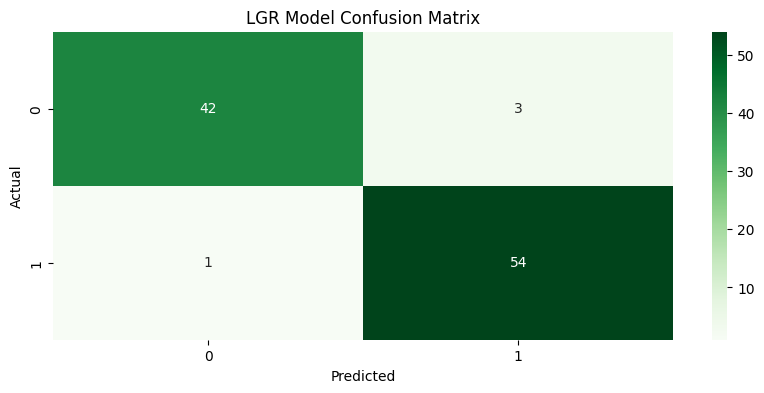

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10, 4))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Greens")
plt.title('LGR Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()